Part 1. For each json file, you are to take the following steps:
 a. Load the json file into a Python data-frame (read_json is recommended, though you are welcome to use
whatever approach preferred), and perform the following:
 b. discard any rows that lack ANY of the 5 characteristics (Title, id, Score, Num_Comments, Date). Note that
such rows will be missing the characteristics entirely (see the third submission within sub_class1.json as an
example). Rows that include empty strings, 0 values, etc. should not be discarded for possessing them.
 c. after doing so, discard the id characteristic, as it will not be used with future tasks.
 d. Save this modified data-frame to a json file with the name sub_class#_P1.json, where # is the original json file
id (ex: after modification, the data from sub_class0.json will be written to file sub_class0_P1.json, etc.) It is
highly recommended that you use the data-frame to_json method for this task. If you do not, you must mention
in your README or jupyter cells what alternative was used (so that we can properly read in your josen classifiers provide acceptable
accuracy for the task.

In [9]:
import pandas as pd
df_Basketball = pd.read_json('sub_class0.json').dropna().drop('id', axis=1)
df_ML = pd.read_json('sub_class1.json').dropna().drop('id', axis=1)
df_PF = pd.read_json('sub_class2.json').dropna().drop('id', axis=1)
df_Louisville = pd.read_json('sub_class3.json').dropna().drop('id', axis=1)

df_Basketball.to_json('sub_class0_P1.json', orient='records')
df_ML.to_json('sub_class1_P1.json', orient='records')
df_PF.to_json('sub_class2_P1.json', orient='records')
df_Louisville.to_json('sub_class3_P1.json', orient='records')

display(df_ML)

,Title,Score,Num_Comments,Date
0,[Project] From books to presentations in 10s w...,7855.0,187.0,2020-05-10
1,[D] A Demo from 1993 of 32-year-old Yann LeCun...,5892.0,133.0,2021-01-10
3,[N] AI can turn old photos into moving Images ...,4711.0,230.0,2021-02-28
4,[D] This AI reveals how much time politicians ...,4600.0,228.0,2021-07-11
5,[D] Types of Machine Learning Papers,4398.0,219.0,2021-05-01
...,...,...,...,...
95,[P] Tutorial: Real-time YOLOv3 on a Laptop Usi...,1216.0,72.0,2021-05-29
96,[R] RMA algorithm: Robots that learn to adapt ...,1201.0,75.0,2021-07-10
97,[P] Trained a Sub-Zero bot for Mortal Kombat I...,1198.0,78.0,2020-08-08
98,[D] Dedicated to all those researchers in fear...,1187.0,119.0,2018-06-06


Part 2. For each modified data-frame (i.e. after the transformation from part 1) you are to take the following
steps:
 a. use textblob to calculate the sentiment polarity of each submission’s title (ignore the subjectivity, and don’t
use the NaiveBayesAnalyzer option). You may want to store these in a structure (ex: list) to make step b simple.
 b. Add a new column to your modified data-frame called “Sentiment,” which includes the value computed in
step a above for each entry/row.
 c. You are to then eliminate every row from your modified data-frame with “neutral” sentiment, defined to be
any sentiment that falls between -0.1 and 0.1, inclusive (you must eliminate rows with 0.1 or -0.1 sentiment).
 d. Save this modified data-frame to a json file with the name sub_class#_P2.json, where # is the original json file
id (ex: after modification, the data from sub_class0.json will be written to file sub_class0_P2.json, etc.)

In [16]:
from textblob import TextBlob

for i, row in df_Basketball.iterrows():
    sentiment_polarity = TextBlob(row["Title"]).sentiment.polarity
    df_Basketball.at[i, "Sentiment"] = sentiment_polarity

rowsToDrop = df_Basketball[(df_Basketball['Sentiment'] >= -0.1) & (df_Basketball['Sentiment'] <= 0.1)].index
df_Basketball.drop(rowsToDrop, inplace=True)
    
for i, row in df_ML.iterrows():
    sentiment_polarity = TextBlob(row["Title"]).sentiment.polarity
    df_ML.at[i, "Sentiment"] = sentiment_polarity

rowsToDrop = df_ML[(df_ML['Sentiment'] >= -0.1) & (df_ML['Sentiment'] <= 0.1)].index
df_ML.drop(rowsToDrop, inplace=True)

for i, row in df_PF.iterrows():
    sentiment_polarity = TextBlob(row["Title"]).sentiment.polarity
    df_PF.at[i, "Sentiment"] = sentiment_polarity

rowsToDrop = df_PF[(df_PF['Sentiment'] >= -0.1) & (df_PF['Sentiment'] <= 0.1)].index
df_PF.drop(rowsToDrop, inplace=True)

for i, row in df_Louisville.iterrows():
    sentiment_polarity = TextBlob(row["Title"]).sentiment.polarity
    df_Louisville.at[i, "Sentiment"] = sentiment_polarity

rowsToDrop = df_Louisville[(df_Louisville['Sentiment'] >= -0.1) & (df_Louisville['Sentiment'] <= 0.1)].index
df_Louisville.drop(rowsToDrop, inplace=True)

df_Basketball.to_json('sub_class0_P2.json', orient='records')
df_ML.to_json('sub_class1_P2.json', orient='records')
df_PF.to_json('sub_class2_P2.json', orient='records')
df_Louisville.to_json('sub_class3_P2.json', orient='records')


Part 3. Using the data from step 2 (make sure you compute sentiment and exclude “neutral” submissions!),
create a simple bar plot that depicts the following quantities related to sentiment in order (8 bars in total):
i. # of class0 submissions with positive sentiment, ii. # of class0 submissions with negative sentiment
iii. # of class1 submissions with positive sentiment, iv. # of class1 submissions with negative sentiment
v. # of class2 submissions with positive sentiment, vi. # of class2 submissions with negative sentiment
vii. # of class3 submissions with positive sentiment, viii. # of class3 submissions with negative sentiment
You are free to use whatever presentation style you want for the bar plots, but make sure you include a legend or
x-axis labels that clearly indicate which quantity each bar represents – and you must use the bar order above (left
to right or top to bottom).

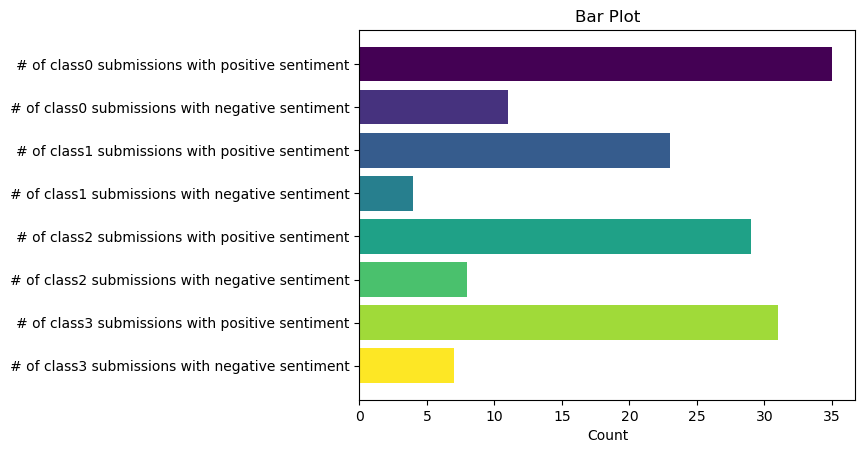

In [30]:
import matplotlib.pyplot as plt
import numpy as np

pos_sent_0 = len(df_Basketball[df_Basketball["Sentiment"] > 0])
neg_sent_0 = len(df_Basketball[df_Basketball["Sentiment"] < 0])

pos_sent_1 = len(df_ML[df_ML["Sentiment"] > 0])
neg_sent_1 = len(df_ML[df_ML["Sentiment"] < 0])

pos_sent_2 = len(df_PF[df_PF["Sentiment"] > 0])
neg_sent_2 = len(df_PF[df_PF["Sentiment"] < 0])

pos_sent_3 = len(df_Louisville[df_Louisville["Sentiment"] > 0])
neg_sent_3 = len(df_Louisville[df_Louisville["Sentiment"] < 0])

labels = ["# of class0 submissions with positive sentiment", "# of class0 submissions with negative sentiment", "# of class1 submissions with positive sentiment", "# of class1 submissions with negative sentiment", "# of class2 submissions with positive sentiment", "# of class2 submissions with negative sentiment", "# of class3 submissions with positive sentiment", "# of class3 submissions with negative sentiment"][::-1]
values = [pos_sent_0, neg_sent_0, pos_sent_1, neg_sent_1, pos_sent_2, neg_sent_2, pos_sent_3, neg_sent_3][::-1]

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))[::-1]

plt.barh(labels, values, color=colors)

plt.xlabel('Count')
plt.title('Bar Plot')

plt.show()

Part 4. Pool together all modified submissions from Part 2 into a single data-frame, but include an additional
column named Class that corresponds to the original submission’s subreddit class (i.e. 0, 1, 2, or 3). Ex: If there
are 37 submissions from the class2 subreddit in the combined data-frame, the Class column for each of the 37
submissions should have a value of 2. Save this consolidated data-frame to a json file with the name
sub_combined.json.

In [32]:
df_Basketball["Class"] = 0
df_ML["Class"] = 1
df_PF["Class"] = 2
df_Louisville["Class"] = 3

combined_dataframe = pd.concat([df_Basketball, df_ML, df_PF, df_Louisville], ignore_index=True)
combined_dataframe.to_json('sub_combined.json', orient='records')
display(combined_dataframe)

,Title,Score,Num_Comments,Date,Sentiment,Class
0,Kobe Bryant killed in a helicopter crash - TMZ,1356.0,249.0,2020-01-26,-0.200000,0
1,So true...,584.0,13.0,2017-04-11,0.350000,0
2,Nasty,403.0,21.0,2019-01-08,-1.000000,0
3,"If you’re ever feeling useless, just remember ...",390.0,22.0,2021-06-21,-0.500000,0
4,Michael Jordan tipped a waitress a $5 chip. Wa...,343.0,41.0,2022-10-02,0.500000,0
...,...,...,...,...,...,...
143,Gov. Andy Beshear to lead national task force ...,641.0,90.0,2021-01-20,0.200000,3
144,An empty Churchill Downs on what would have be...,644.0,47.0,2020-05-02,0.450000,3
145,"The owner of guacamole, bodeguita de Mimi and ...",635.0,704.0,2022-11-03,0.250000,3
146,Earlier this month I posted here asking for ph...,634.0,46.0,2023-01-20,0.125000,3


Part 5. i. Using your combined collection data-frame from Part 4, assuming it has n submissions in total, your next
goal is to construct a n x 5 numpy feature array suited for machine learning. Each row in the array corresponds to
a row in your data-frame, and the 5 array columns represent the features for the submission at that position as
follows:
Feature 1: The character length of the submission’s title (don’t preprocess the title in any way!)
Feature 2: The sentiment of the submission’s title.
Feature 3: The submission’s Score.
Feature 4: The submission’s number of comments (Num_Comments).
Feature 5: The year of the submission (note there are several ways to extract the year from a Date in Python).
For example, one row in your feature array may look like the below:
[46. , -0.2 , 1356.0 , 249.0, 2020. ]
meaning that the corresponding submission had a title with 46 characters, sentiment of -0.2, score of 1356, 249
comments, and was posted in the year 2020.
ii. Now create a n x 1 numpy array using the Class column you added in Part 4. Each row here represents a target
variable for classification that matches the corresponding submission. For example, if the first 46 rows in your
data-frame from Part 4 correspond to class 0 submissions, then the first 46 entries in this array should likewise be
0.
iii. You are to then perform 10-fold cross-validation using one classification estimator (either one used during the
course module on machine learning, or one of your own choosing) to determine the accuracy available in using
the features from the nx5 array in predicting the Class given in the nx1 array. For full credit, you should produce
both classifier accuracy for each cross-validation and a confusion matrix for the classifier predictions. You may
want to look into using cross_val_predict for the latter. Write a few sentences (comments or a separate text file
are fine for this) discussing whether or not you think the features and chosen classifiers provide acceptable
accuracy for the task.

In [50]:
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

rows = []

for i, row in combined_dataframe.iterrows():
    rows.append(np.array([len(row["Title"]), row["Sentiment"], row["Score"], row["Num_Comments"], row["Date"].year]))


X = np.array(rows)
y = np.array(combined_dataframe["Class"])

kf = KFold(n_splits=10, shuffle=True, random_state=1)

classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(classifier, X, y, cv=kf)

print("Average Score: " + str(cv_scores.mean()))
print(cv_scores)

Average Score: 0.9390476190476191
[0.86666667 0.86666667 0.93333333 1.         0.93333333 1.
 1.         0.93333333 0.85714286 1.        ]


In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_predicted = cross_val_predict(classifier, X, y, cv=kf)

conf_matrix = confusion_matrix(y, y_predicted)

print(conf_matrix)

[[44  1  0  1]
 [ 1 25  0  1]
 [ 0  0 37  0]
 [ 0  4  0 34]]


**Write a few sentences discussing whether or not you think the features and chosen classifiers provide acceptable accuracy for the task:**

With an average cross validation accuracy of around 94%, I do beleive that these features and my chosen classifier (decision tree) provided acceptable accuracy for this ML task. 94% is a very good accuracy especially since we only had around 150 samples to train our classifier on. You can also notice that around half of my cross validation scores showed 100% accuracy with my model. With regards to the confusion martrix you can see that our classifier was able to find a reliable distinction between class 0, class 1, and class 2, but struggled a small amount with classifing class 3; however, overall this classifer performed very well with the given dataset.

